### build a ximple workflow and graph using langGraph

In [ ]:
from typing_extensions import TypedDict

class State(TypedDict):
    graph_info:str
    
    
def start_play(state:State):
    print("start play node has been called")
    return {"graph_info":state['graph_info'] + " I am planning to play " }
def cricket_play(state:State):
    print("cricket node has been called")
    return {"graph_info":state['graph_info'] + "cricket" }
def badminton_play(state:State):
    print("badminton node has been called")
    return {"graph_info":state['graph_info'] + "Badminton" }

In [15]:
import random
from typing import Literal

def random_play(state: State) -> Literal['cricket_play', 'badminton_play']:
    if random.random() > 0.5:
        return 'cricket_play'
    else:
        return 'badminton_play'



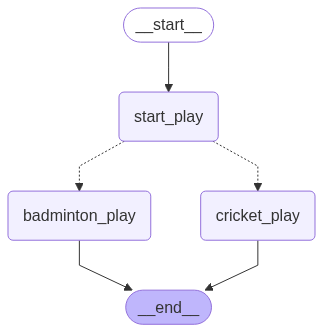

In [16]:
from IPython.display import Image, display
from langgraph.graph import StateGraph, START, END

# Build graph
graph = StateGraph(State)

# Adding the nodes
graph.add_node("start_play", start_play)
graph.add_node("cricket_play", cricket_play)
graph.add_node("badminton_play", badminton_play)

# Define flow
graph.add_edge(START, "start_play")
graph.add_conditional_edges("start_play", random_play)
graph.add_edge("cricket_play", END)
graph.add_edge("badminton_play", END)

# Visualize the graph
graph_builder = graph.compile()
display(Image(graph_builder.get_graph().draw_mermaid_png()))


start play node has been called
badminton node has been called


{'graph_info': 'my name is bilal siddiquei am planning to playBadminton'}